# Logistic Regression 
### AutoEncoder로 전처리한 코드



In [1]:
import os
import pandas as pd

os.chdir("C:/Users/Kyuree Jeon/Desktop/귤/20-2/딥러닝/기말 팀플/모델링 데이터")

In [2]:
import numpy as np

X_auto_val = np.load("X_val_enc.npy")
X_auto_test = np.load("X_test_enc.npy")
X_auto_train = np.load("X_train_enc.npy")

X_val = np.load("X_val.npy")
X_test = np.load("X_test.npy")
X_train = np.load("X_train.npy")

y_val = np.load("y_val.npy")
y_test = np.load("y_test.npy")
y_train = np.load("y_train.npy")

In [3]:
# 모델링 편의를 위해 train, val 데이터셋을 합쳐주었습니다. 

X_auto_train_val = np.vstack([X_auto_train,X_auto_val])

In [4]:
y_trainval = np.concatenate((y_train,y_val),axis=0)

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [6]:
lr = LogisticRegression(random_state=0, solver='liblinear')

In [7]:
param_grid ={'C':[0.01,0.1,1,10,100],
            'penalty':['l1','l2']}
gs = GridSearchCV(estimator=lr,param_grid=param_grid, scoring='accuracy',cv=5)

In [8]:
# Gridsearch를 이용해서 LR 모델링을 해줍니다. 

gs.fit(X_auto_train_val, y_trainval)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [9]:
gs.score(X_auto_test, y_test)

0.75

In [10]:
y_pred = gs.predict(X_auto_test)
y_pred_softmax =gs.decision_function(X_auto_test)

In [11]:
# 모델링 결과 평가를 위해 그래프를 저장할 경로를 지정합니다. 

path = "C:/Users/Kyuree Jeon/Desktop/귤/20-2/딥러닝/기말 팀플/모델링 데이터/모델링 결과/"

# Evaluation Function

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

def evaluation(y_true, y_pred, model_name = "Logistic Regression"): 
    # 실제값, 모델이 예측한 값 순서로 넣어주세요. model_name은 plot에 나올 제목 이름입니다. # 라벨 순서는 0이 정상 1이 질병입니다.
    print(classification_report(y_true, y_pred))

    plt.figure(figsize=[8,8])
    plt.title(model_name+" confusion matrix", fontsize = 20)
    labels = ["Negative", "Positive"]
    conf_m = pd.DataFrame(confusion_matrix(y_true, y_pred), index = labels, columns = labels)
    ax = sns.heatmap(conf_m, cmap="Blues", annot=True,fmt='5')
    plt.yticks(va="center")
    plt.savefig(path+model_name+"_confusion_matrix.pdf")

def AUROC_Curve(y_true, y_pred_softmax, model_name):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_softmax)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.02])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(model_name)
    plt.legend(loc="lower right")
    plt.savefig(path+model_name+"_auroc_curve.pdf")

## 전처리한 데이터

C:\Users\Kyuree Jeon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.75      1.00      0.86        15
           1       0.00      0.00      0.00         5

    accuracy                           0.75        20
   macro avg       0.38      0.50      0.43        20
weighted avg       0.56      0.75      0.64        20



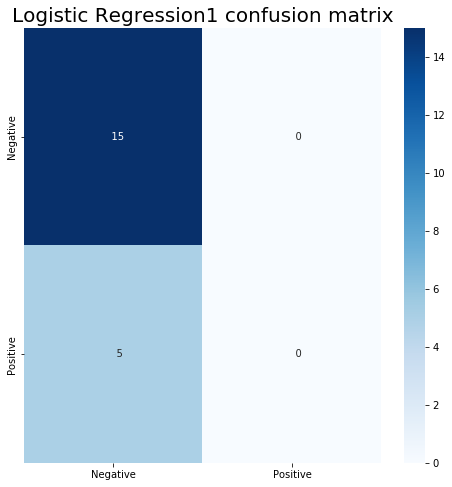

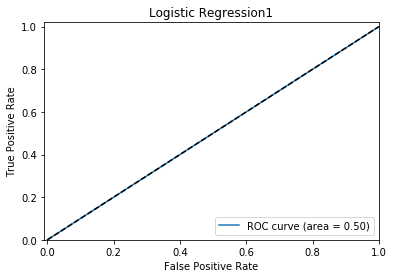

In [13]:
evaluation(y_test, y_pred, "Logistic Regression1")
AUROC_Curve(y_test, y_pred_softmax, "Logistic Regression1")

# Logistic Regression - 전처리 안한 기본 데이터셋으로 모델링 


In [14]:
import os
import pandas as pd

os.chdir("C:/Users/Kyuree Jeon/Desktop/귤/20-2/딥러닝/기말 팀플/모델링 데이터")

In [15]:
import numpy as np

X_auto_val = np.load("X_auto_val.npy")
X_auto_test = np.load("X_auto_test.npy")
X_auto_train = np.load("X_auto_train.npy")

X_val = np.load("X_val.npy")
X_test = np.load("X_test.npy")
X_train = np.load("X_train.npy")

y_val = np.load("y_val.npy")
y_test = np.load("y_test.npy")
y_train = np.load("y_train.npy")

In [16]:
X_auto_train_val = np.vstack([X_auto_train,X_auto_val])

In [17]:
X_auto_train_val

array([[1023.22686768,  317.269104  , 1000.75970459, ..., 2654.59545898,
         843.45928955, 1545.92614746],
       [1463.83081055,  713.04760742,    0.        , ...,  384.88162231,
         351.47369385,  668.26953125],
       [   0.        ,    0.        , 2340.61645508, ...,    0.        ,
         195.94404602, 1139.46691895],
       ...,
       [1732.80334473,  763.11505127,  380.35113525, ...,  929.40319824,
        2954.18408203,  435.85122681],
       [ 467.32440186,    0.        ,  196.61221313, ..., 1765.06237793,
        1418.15429688, 1550.38049316],
       [   0.        ,    0.        ,    0.        , ..., 3671.18261719,
        2722.16772461, 2757.23461914]])

In [18]:
y_trainval = np.concatenate((y_train,y_val),axis=0)

# Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


In [20]:
lr = LogisticRegression(random_state=0, solver='liblinear')

In [21]:
param_grid ={'C':[0.01,0.1,1,10,100],
            'penalty':['l1','l2']}
gs = GridSearchCV(estimator=lr,param_grid=param_grid, scoring='accuracy',cv=5)

In [22]:
gs.fit(X_auto_train_val, y_trainval)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [23]:
gs.score(X_auto_test, y_test)

0.7

In [24]:
y_pred = gs.predict(X_auto_test)
y_pred_softmax =gs.decision_function(X_auto_test)

In [25]:
path = "C:/Users/Kyuree Jeon/Desktop/귤/20-2/딥러닝/기말 팀플/모델링 데이터/모델링 결과/"

In [26]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

def evaluation(y_true, y_pred, model_name = "Logistic Regression"): 
    # 실제값, 모델이 예측한 값 순서로 넣어주세요. model_name은 plot에 나올 제목 이름입니다. # 라벨 순서는 0이 정상 1이 질병입니다.
    print(classification_report(y_true, y_pred))

    plt.figure(figsize=[8,8])
    plt.title(model_name+" confusion matrix", fontsize = 20)
    labels = ["Negative", "Positive"]
    conf_m = pd.DataFrame(confusion_matrix(y_true, y_pred), index = labels, columns = labels)
    ax = sns.heatmap(conf_m, cmap="Blues", annot=True,fmt='5')
    plt.yticks(va="center")
    plt.savefig(path+model_name+"_confusion_matrix.pdf")

def AUROC_Curve(y_true, y_pred_softmax, model_name):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_softmax)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.02])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(model_name)
    plt.legend(loc="lower right")
    plt.savefig(path+model_name+"_auroc_curve.pdf")

## 원본 데이터 성능

              precision    recall  f1-score   support

           0       0.76      0.87      0.81        15
           1       0.33      0.20      0.25         5

    accuracy                           0.70        20
   macro avg       0.55      0.53      0.53        20
weighted avg       0.66      0.70      0.67        20



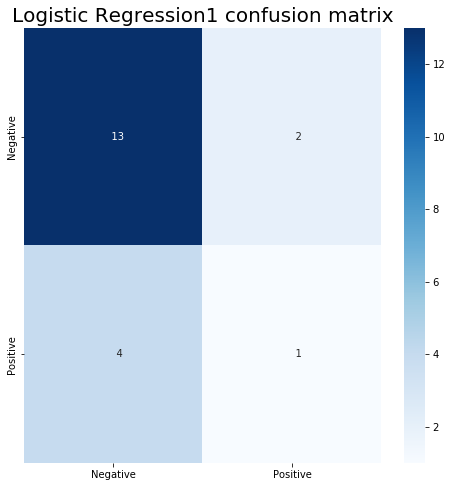

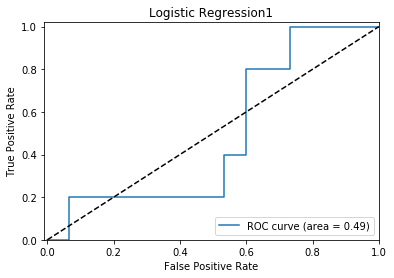

In [27]:
evaluation(y_test, y_pred, "Logistic Regression1")
AUROC_Curve(y_test, y_pred_softmax, "Logistic Regression1")